In [182]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [183]:
# Load data
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [184]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [185]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


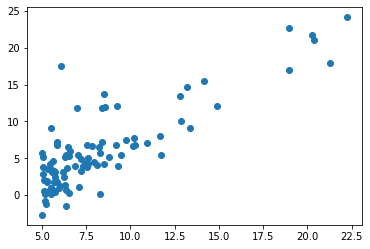

In [186]:
# Plot and analyze the data, where: x - population, y - profit
fig, ax  = plt.subplots()
ax.scatter(data['Population'], data['Profit'])

In [187]:
# Ex. 3 In order to make this cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.
d_len = len(data)
data.insert(0, "Ones", 1)
data.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [188]:
# Ex 4
X = data[['Ones', 'Population']]
y = data['Profit']


In [189]:
X_t = np.array(X.values)
y_t = np.array(y.values)
theta_t = np.array(np.array([0, 0]))

In [190]:
# Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

# def computeCost(X, y, theta):
#     inner = np.power((( theta@X.T) - y), 2)
#     return np.sum(inner) / (2*X.shape[0])

def computeCost(X, y, theta):
    m = len(y)

    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


In [191]:
test1 = computeCost(X_t, y_t, theta_t)
print(test1)

32.072733877455676


In [192]:
# Ex. 7 Please implement the gradient descent algorithm: the function returns optimized values θ and a vector of the cost function value for each iteration

# def simple_gradient(X, y, theta_t, alpha_t, it):
#     cost = 0
#     # m = X.shape[0]
#     m = len(X)
#     cost = []
#     for i in range(it):
#         # h = theta@X.T
#         # theta0_d = alpha * (1/m)*np.sum(h - y)
#         # theta1_d = alpha * (1/m)*np.sum(h - y)*X[:, 1].T
#         # theta[0] = theta[0] - theta0_d
#         # theta[1] = theta[1] - theta1_d
#         theta_t = theta_t - alpha_t*(np.transpose(X).dot(X.dot(theta_t)-y))/m
#         cost.append(computeCost(X, y, theta_t))
#     return theta, cost

# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

def simple_gradient(X, y, theta, alpha, it):
    m = len(y)
    cost_history = np.zeros(it)
    theta_history = np.zeros((it, 2))

    for i in range(it):
        prediction = np.dot(X, theta)
        theta = theta - (1/m)*alpha*(X.T.dot(prediction - y))
        theta_history[i, :] = theta.T
        cost_history[i] = computeCost(X, y, theta)
        print(i, cost_history[i])

    return theta, cost_history




In [193]:
gradient = simple_gradient(X_t, y_t, theta_t, 0.01, 1500)
gradient[0]

0 6.737190464870009
1 5.9315935686049555
2 5.901154707081388
3 5.895228586444221
4 5.8900949431173295
5 5.885004158443647
6 5.879932480491418
7 5.874879094762575
8 5.869843911806385
9 5.86482686531293
10 5.859827889932181
11 5.85484692057229
12 5.849883892376587
13 5.844938740722034
14 5.840011401218361
15 5.835101809707226
16 5.830209902261388
17 5.825335615183863
18 5.820478885007099
19 5.815639648492154
20 5.810817842627869
21 5.806013404630044
22 5.801226271940628
23 5.7964563822269
24 5.7917036733806535
25 5.7869680835173956
26 5.782249550975539
27 5.777548014315596
28 5.7728634123193805
29 5.768195683989212
30 5.76354476854712
31 5.758910605434047
32 5.754293134309077
33 5.749692295048628
34 5.745108027745684
35 5.740540272709012
36 5.735988970462381
37 5.731454061743792
38 5.726935487504702
39 5.722433188909257
40 5.717947107333529
41 5.713477184364749
42 5.709023361800549
43 5.704585581648198
44 5.7001637861238565
45 5.695757917651815
46 5.691367918863751
47 5.68699373259798
48

array([-3.63029144,  1.16636235])

In [194]:
theta_best = np.linalg.inv(X_t.T.dot(X_t)).dot(X.T).dot(y_t)
theta_best

array([-3.89578088,  1.19303364])

(4.0, 23.0)

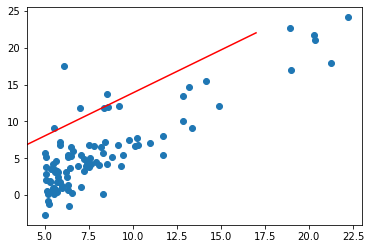

In [195]:
fig, ax = plt.subplots()
ax.scatter(X_t[:, 1], y_t)
# To trzeba poprawić wyliczanie ma być w inny sposób!!!!!
ax.plot([gradient[0][0] + gradient[0][1]*i for i in range(5, 23)], 'r-' )
ax.set_xlim(4, 23)

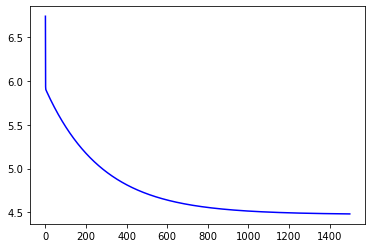

In [196]:
# Plot the relationship between the cost function and number of iterations.
fig, ax = plt.subplots()
ax.plot([i for i in range(0, 1500)], gradient[1], 'b-' )

In [197]:
path = os.getcwd() + '\\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [198]:
# Ex 4
X_t2 = data2[['Size', 'Bedrooms']]
y_t2 = data2['Price']
X_t2 = np.array(X_t2)
y_t2 = np.array(y_t2)
theta_t2 = np.array(np.array([0, 0]))

In [199]:
# gradient2D = simple_gradient(X_t2, y_t2, theta_t2, 0.01, 1500)
computeCost(X_t2, y_t2, theta_t2) # Do poprawy, trzeba znormalizować

65591548106.45744